In [1]:
from catboost import CatBoostClassifier
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, roc_auc_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

# seed
# import os
# import random
# os.environ['PYTHONHASHSEED']=str(271828)
# random.seed(271828)
# np.random.seed(271828)


Using TensorFlow backend.
C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
path = "C:\‏‏PycharmProjects\PTSD\Data\PTSD.xlsx"
df = pd.read_excel(path)
#combine with specifics of answers
df_pcl2 = pd.read_excel("C:\‏‏PycharmProjects\PTSD\Data\questionnaire6PCL2.xlsx")

df_pcl1 = pd.read_excel("C:\‏‏PycharmProjects\PTSD\Data\questionnaire6PCL1.xlsx")

df = df.merge(df_pcl1, on="ID", how='outer')
df = df.merge(df_pcl2, suffixes=('_pcl1', '_pcl2'), on="ID", how='outer')


df = df[~df['PCL_Strict3'].isna()]


## features 

In [3]:

features = ["highschool_diploma", "dyslexia",  "ADHD", "T1Acc1t", "T1Acc1n", "T1bias", 'Ashken_scale', 'Sephar_scale',
            "phq1", "lot1", "trait1",
                "state1", "PCL1", "PCL_Broad1", "PCL_Strict1", "phq2", "lot2", "trait2", "state2", "PCL2", "PCL_Broad2",
                "PCL_Strict2", "cd_risc1", "active_coping1", "planning1", "positive_reframing1", "acceptance1",
                "humor1",
                "religion1", "emotional_support1", "instrumental_support1", "self_distraction1", "denial1",
                "venting1", "substance_use1", "behavioral_disengagement1", "self_blame1", "active_coping2", "planning2",
                "positive_reframing2", "acceptance2", "humor2", "religion2", "emotional_support2",
                "instrumental_support2",
                "self_distraction2", "denial2", "venting2", "substance_use2", "behavioral_disengagement2",
                "self_blame2",
                "trauma_history8_1", "HML_5HTT", "HL_MAOA", "HML_NPY", "COMT_Hap1_recode",
                "COMT_Hap2_recode", "COMT_Hap1_LvsMH", "HML_FKBP5", 'q6.1_INTRU_pcl1', 
                'q6.2_DREAM_pcl1', 'q6.3_FLASH_pcl1', 'q6.4_UPSET_pcl1',
                  'q6.5_PHYS_pcl1', 'q6.6_AVTHT_pcl1', 'q6.7_AVSIT_pcl1', 'q6.8_AMNES_pcl1', 'q6.9_DISINT_pcl1',
                  'q6.10_DTACH_pcl1', 'q6.11_NUMB_pcl1', 'q6.12_FUTRE_pcl1', 'q6.13_SLEEP_pcl1',
                  'q6.14_ANGER_pcl1', 'q6.15_CONC_pcl1', 'q6.16_HYPER_pcl1', 'q6.17_STRTL_pcl1',
                  'q6.1_INTRU_pcl2', 'q6.2_DREAM_pcl2', 'q6.3_FLASH_pcl2', 'q6.4_UPSET_pcl2',
                  'q6.5_PHYS_pcl2', 'q6.6_AVTHT_pcl2', 'q6.7_AVSIT_pcl2', 'q6.8_AMNES_pcl2', 'q6.9_DISINT_pcl2',
                  'q6.10_DTACH_pcl2', 'q6.11_NUMB_pcl2', 'q6.12_FUTRE_pcl2', 'q6.13_SLEEP_pcl2',
                  'q6.14_ANGER_pcl2', 'q6.15_CONC_pcl2', 'q6.16_HYPER_pcl2', 'q6.17_STRTL_pcl2',
      
]

## fill the missing values

In [4]:
target_feature = ['PCL_Strict3']

In [5]:
df1 = df[features + target_feature]



## cut off the test set

In [6]:
X, X_out, Y, y_out = train_test_split(df1[features], df1[target_feature[0]],
                                      test_size=0.25, random_state=56, stratify=df1[target_feature[0]])


## the Model

## CV model of roc auc 

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [8]:

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
    cv = StratifiedKFold(6)

    print(f"i = {i}")
    pipe = CatBoostClassifier(verbose=0)
        
    grid_params = [{
    'class_weights':[[1, 25]],
    #'grow_policy': ['SymmetricTree', 'Depthwiise', 'Lossguide'],
    'l2_leaf_reg': [100],
    'depth': [6, 3]
    }]

    clf = GridSearchCV(pipe, grid_params, cv=cv, scoring='roc_auc')
    clf.fit(X_train, y_train.values.astype(int), early_stopping_rounds=15)
    print(f"i = {i}, roc_auc = {clf.best_score_}, params = {clf.best_params_}")
    y_pred_target = clf.best_estimator_.predict_proba(X_test)[:, 1]
    print(f"holdout i = {i}, roc_auc = {roc_auc_score(y_test.astype(int), y_pred_target)}")

i = 0


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


i = 0, roc_auc = 0.8275413391162916, params = {'class_weights': [1, 25], 'depth': 6, 'l2_leaf_reg': 100}
holdout i = 0, roc_auc = 0.7535014005602241
i = 1
i = 1, roc_auc = 0.8028530767145567, params = {'class_weights': [1, 25], 'depth': 6, 'l2_leaf_reg': 100}
holdout i = 1, roc_auc = 0.7086834733893557
i = 2


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


i = 2, roc_auc = 0.7663594470046083, params = {'class_weights': [1, 25], 'depth': 6, 'l2_leaf_reg': 100}
holdout i = 2, roc_auc = 0.8179271708683473


In [9]:
pipe = CatBoostClassifier(verbose=0)
        
grid_params = [{

    'class_weights':[[1, 25]],
    #'grow_policy': ['SymmetricTree', 'Depthwiise', 'Lossguide'],
    'l2_leaf_reg': [100],
    'depth': [6, 3]
    }]


clf = GridSearchCV(pipe, grid_params, cv=cv, scoring='roc_auc')
clf.fit(X_train, y_train.values.astype(int), early_stopping_rounds=15)
print(f"i = {i}, roc_auc = {clf.best_score_}, params = {clf.best_params_}")

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


i = 2, roc_auc = 0.7663594470046083, params = {'class_weights': [1, 25], 'depth': 6, 'l2_leaf_reg': 100}


In [10]:
y_pred_target= clf.predict_proba(X_out)[:, 1]

In [11]:
print(f"test roc_auc = {roc_auc_score(y_out, y_pred_target)}")

test roc_auc = 0.88782562466773


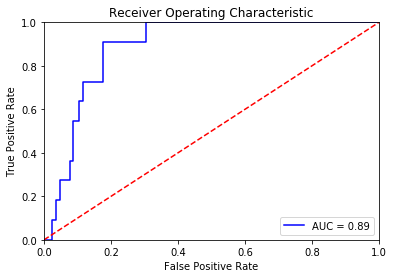

In [12]:

fpr, tpr, threshold = roc_curve(y_out, y_pred_target)
roc_auc = auc(fpr, tpr)
                    # method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 